# k-Means

## 方法

由于具有出色的速度和良好的可扩展性，K-Means聚类算法算得上是最著名的聚类方法。***K-Means算法是一个重复移动类中心点的过程，把类的中心点，也称重心（centroids），移动到其包含成员的平均位置，然后重新划分其内部成员。***

K是算法计算出的超参数，表示类的数量；K-Means可以自动分配样本到不同的类，但是不能决定究竟要分几个类。

K必须是一个比训练集样本数小的正整数。有时，类的数量是由问题内容指定的。例如，一个鞋厂有三种新款式，它想知道每种新款式都有哪些潜在客户，于是它调研客户，然后从数据里找出三类。也有一些问题没有指定聚类的数量，最优的聚类数量是不确定的。

K-Means的参数是类的重心位置和其内部观测值的位置。与广义线性模型和决策树类似，K-Means参数的最优解也是以成本函数最小化为目标。K-Means成本函数公式如下：
$$
J = \sum_{k=1}^{K} \sum_{i \in C_k} | x_i - u_k|^2
$$

$u_k$是第$k$个类的重心位置，定义为：
$$
u_k = \frac{1}{|C_k|} \sum_{x \in C_k} x
$$


成本函数是各个类畸变程度（distortions）之和。每个类的畸变程度等于该类重心与其内部成员位置距离的平方和。若类内部的成员彼此间越紧凑则类的畸变程度越小，反之，若类内部的成员彼此间越分散则类的畸变程度越大。

求解成本函数最小化的参数就是一个重复配置每个类包含的观测值，并不断移动类重心的过程。
1. 首先，类的重心是随机确定的位置。实际上，重心位置等于随机选择的观测值的位置。
2. 每次迭代的时候，K-Means会把观测值分配到离它们最近的类，然后把重心移动到该类全部成员位置的平均值那里。
3. 若达到最大迭代步数或两次迭代差小于设定的阈值则算法结束，否则重复步骤2。



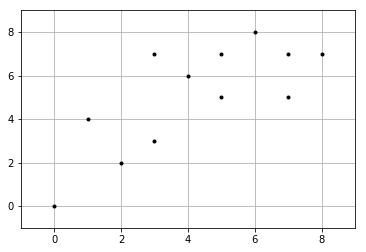

In [6]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X0 = np.array([7, 5, 7, 3, 4, 1, 0, 2, 8, 6, 5, 3])
X1 = np.array([5, 7, 7, 3, 6, 4, 0, 2, 7, 8, 5, 7])
plt.figure()
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0, X1, 'k.');

假设K-Means初始化时，将第一个类的重心设置在第5个样本，第二个类的重心设置在第11个样本.那么我们可以把每个实例与两个重心的距离都计算出来，将其分配到最近的类里面。计算结果如下表所示：
![data_0](images/data_0.png)

新的重心位置和初始聚类结果如下图所示。第一类用X表示，第二类用点表示。重心位置用稍大的点突出显示。




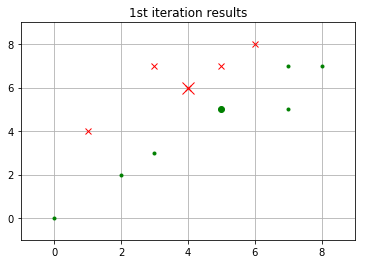

In [7]:
C1 = [1, 4, 5, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('1st iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(4,6,'rx',ms=12.0)
plt.plot(5,5,'g.',ms=12.0);

现在我们重新计算两个类的重心，把重心移动到新位置，并重新计算各个样本与新重心的距离，并根据距离远近为样本重新归类。结果如下表所示：

![data_1](images/data_1.png)

画图结果如下：

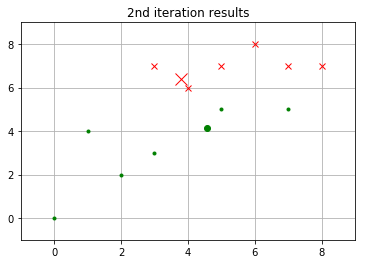

In [8]:
C1 = [1, 2, 4, 8, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('2nd iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(3.8,6.4,'rx',ms=12.0)
plt.plot(4.57,4.14,'g.',ms=12.0);

我们再重复一次上面的做法，把重心移动到新位置，并重新计算各个样本与新重心的距离，并根据距离远近为样本重新归类。结果如下表所示：
![data_2](images/data_2.png)

画图结果如下：


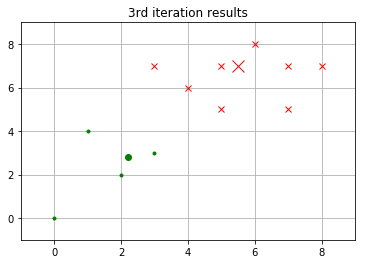

In [9]:
C1 = [0, 1, 2, 4, 8, 9, 10, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('3rd iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(5.5,7.0,'rx',ms=12.0)
plt.plot(2.2,2.8,'g.',ms=12.0);

再重复上面的方法就会发现类的重心不变了，K-Means会在条件满足的时候停止重复聚类过程。通常，条件是前后两次迭代的成本函数值的差达到了限定值，或者是前后两次迭代的重心位置变化达到了限定值。如果这些停止条件足够小，K-Means就能找到最优解。不过这个最优解不一定是全局最优解。



## Program

In [10]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

# import librarys
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
import random

# Load dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv("iris.csv", header=0, index_col=0)
dataset.head()


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
#对类别进行编码，3个类别分别赋值0，1，2

dataset['class'][dataset['class']=='Iris-setosa']=0
dataset['class'][dataset['class']=='Iris-versicolor']=1
dataset['class'][dataset['class']=='Iris-virginica']=2

TypeError: list indices must be integers or slices, not Series

In [13]:
def originalDatashow(dataSet):
    #绘制原始的样本点
    num,dim=shape(dataSet)
    marksamples=['ob'] #Sample graphic marking
    for i in range(num):
        plt.plot(datamat.iat[i,0],datamat.iat[i,1],marksamples[0],markersize=5)
    plt.title('original dataset')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width') 
    plt.show()

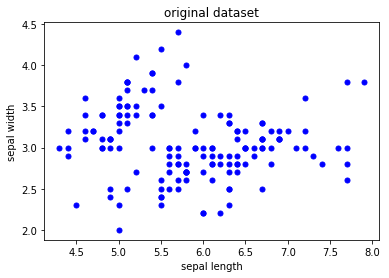

In [14]:
#获取样本数据
datamat = dataset.loc[:, ['sepal-length', 'sepal-width']]
# 真实的标签
labels = dataset.loc[:, ['class']]
#原始数据显示
originalDatashow(datamat)

In [15]:
import random

def randChosenCent(dataSet,k):
    """初始化聚类中心：通过在区间范围随机产生的值作为新的中心点"""

    # 样本数
    m=shape(dataSet)[0]
    # 初始化列表
    centroidsIndex=[]
    
    #生成类似于样本索引的列表
    dataIndex=list(range(m))
    if False:
        for i in range(k):
            #生成随机数
            randIndex=random.randint(0,len(dataIndex))
            #将随机产生的样本的索引放入centroidsIndex
            centroidsIndex.append(dataIndex[randIndex])
            #删除已经被抽中的样本
            del dataIndex[randIndex]
    else:
        random.shuffle(dataIndex)
        centroidsIndex = dataIndex[:k]
    
    #根据索引获取样本
    centroids = dataSet.iloc[centroidsIndex]
    return mat(centroids)

In [24]:

def distEclud(vecA, vecB):
    """算距离, 两个向量间欧式距离"""
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)


def kMeans(dataSet, k):
    # 样本总数
    m = shape(dataSet)[0]
    # 分配样本到最近的簇：存[簇序号,距离的平方] (m行 x 2 列)
    clusterAssment = mat(zeros((m, 2)))

    # step1: 通过随机产生的样本点初始化聚类中心
    centroids = randChosenCent(dataSet, k)
    print('最初的中心=', centroids)

    # 标志位，如果迭代前后样本分类发生变化值为True，否则为False
    clusterChanged = True
    # 查看迭代次数
    iterTime = 0
    
    # 所有样本分配结果不再改变，迭代终止
    while clusterChanged:
        clusterChanged = False
        
        # step2:分配到最近的聚类中心对应的簇中
        for i in range(m):
            # 初始定义距离为无穷大
            minDist = inf;
            # 初始化索引值
            minIndex = -1
            # 计算每个样本与k个中心点距离
            for j in range(k):
                # 计算第i个样本到第j个中心点的距离
                distJI = distEclud(centroids[j, :], dataSet.values[i, :])
                # 判断距离是否为最小
                if distJI < minDist:
                    # 更新获取到最小距离
                    minDist = distJI
                    # 获取对应的簇序号
                    minIndex = j
            # 样本上次分配结果跟本次不一样，标志位clusterChanged置True
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist ** 2  # 分配样本到最近的簇
            
        iterTime += 1
        sse = sum(clusterAssment[:, 1])
        print('the SSE of %d' % iterTime + 'th iteration is %f' % sse)
        
        # step3:更新聚类中心
        for cent in range(k):  # 样本分配结束后，重新计算聚类中心
            # 获取该簇所有的样本点,nonzero[0]表示A == cent的元素所在的行，如果没有[0],列也会表示
            ptsInClust = dataSet.iloc[nonzero(clusterAssment[:, 0].A == cent)[0]]
            # 更新聚类中心：axis=0沿列方向求均值。
            centroids[cent, :] = mean(ptsInClust, axis=0)
    return centroids, clusterAssment


In [16]:
# 进行k-means聚类
k = 3  # 用户定义聚类数
mycentroids, clusterAssment = kMeans(datamat, k)

NameError: name 'kMeans' is not defined

In [26]:
def datashow(dataSet, k, centroids, clusterAssment):  # 二维空间显示聚类结果
    from matplotlib import pyplot as plt
    num, dim = shape(dataSet)  # 样本数num ,维数dim

    if dim != 2:
        print('sorry,the dimension of your dataset is not 2!')
        return 1
    marksamples = ['or', 'ob', 'og', 'ok', '^r', '^b', '<g']  # 样本图形标记
    if k > len(marksamples):
        print('sorry,your k is too large,please add length of the marksample!')
        return 1
        # 绘所有样本
    for i in range(num):
        markindex = int(clusterAssment[i, 0])  # 矩阵形式转为int值, 簇序号
        # 特征维对应坐标轴x,y；样本图形标记及大小
        plt.plot(dataSet.iat[i, 0], dataSet.iat[i, 1], marksamples[markindex], markersize=6)

    # 绘中心点
    markcentroids = ['o', '*', '^']  # 聚类中心图形标记
    label = ['0', '1', '2']
    c = ['yellow', 'pink', 'red']
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], markcentroids[i], markersize=15, label=label[i], c=c[i])
        plt.legend(loc='upper left')  #图例
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')

    plt.title('k-means cluster result')  # 标题
    plt.show()
    
    
# 画出实际图像
def trgartshow(dataSet, k, labels):
    from matplotlib import pyplot as plt

    num, dim = shape(dataSet)
    label = ['0', '1', '2']
    marksamples = ['ob', 'or', 'og', 'ok', '^r', '^b', '<g']
    # 通过循环的方式，完成分组散点图的绘制
    for i in range(num):
        plt.plot(datamat.iat[i, 0], datamat.iat[i, 1], marksamples[int(labels.iat[i, 0])], markersize=6)
    for i in range(0, num, 50):
        plt.plot(datamat.iat[i, 0], datamat.iat[i, 1], marksamples[int(labels.iat[i, 0])], markersize=6,
                 label=label[int(labels.iat[i, 0])])
    plt.legend(loc='upper left')
    
    # 添加轴标签和标题
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.title('iris true result')  # 标题

    # 显示图形
    plt.show()
    # label=labels.iat[i,0]

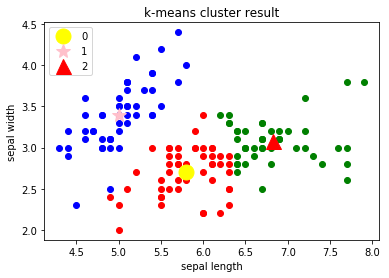

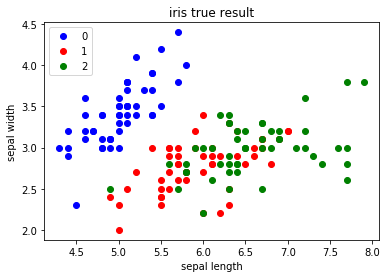

In [9]:
# 绘图显示
datashow(datamat, k, mycentroids, clusterAssment)
trgartshow(datamat, 3, labels)

## 利用sklearn进行分类


<Figure size 432x288 with 0 Axes>

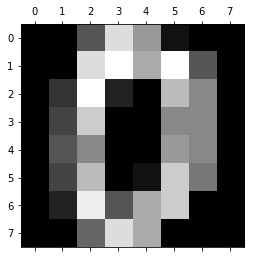

In [27]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

# load digital data
digits, dig_label = load_digits(return_X_y=True)

# draw one digital
plt.gray() 
plt.matshow(digits[0].reshape([8, 8])) 
plt.show() 

# calculate train/test data number
N = len(digits)
N_train = int(N*0.8)
N_test = N - N_train

# split train/test data
x_train = digits[:N_train, :]
y_train = dig_label[:N_train]
x_test  = digits[N_train:, :]
y_test  = dig_label[N_train:]



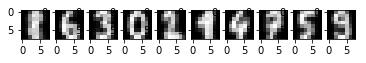

In [28]:
# do kmeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(x_train)

# kmeans.labels_ - output label
# kmeans.cluster_centers_ - cluster centers

# draw cluster centers
fig, axes = plt.subplots(nrows=1, ncols=10)
for i in range(10):
    img = kmeans.cluster_centers_[i].reshape(8, 8)
    axes[i].imshow(img)

## Exerciese - How to caluate the accuracy?

1. How to match cluster label to groundtruth label
2. How to solve the uncertainty of some digital

## 评估聚类性能

方法1： 如果被用来评估的数据本身带有正确的类别信息，则利用Adjusted Rand Index(ARI)，ARI与分类问题中计算准确性的方法类似，兼顾了类簇无法和分类标记一一对应的问题。



In [29]:
from sklearn.metrics import adjusted_rand_score

ari_train = adjusted_rand_score(y_train, kmeans.labels_)
print("ari_train = %f" % ari_train)

ari_train = 0.687021


Given the contingency table:
![ARI_ct](images/ARI_ct.png)

the adjusted index is:
![ARI_define](images/ARI_define.png)

* [ARI reference](https://davetang.org/muse/2017/09/21/adjusted-rand-index/)



方法2： 如果被用来评估的数据没有所属类别，则使用轮廓系数(Silhouette Coefficient)来度量聚类结果的质量，评估聚类的效果。**轮廓系数同时兼顾了聚类的凝聚度和分离度，取值范围是[-1,1]，轮廓系数越大，表示聚类效果越好。** 

轮廓系数的具体计算步骤： 
1. 对于已聚类数据中第i个样本$x_i$，计算$x_i$与其同一类簇内的所有其他样本距离的平均值，记作$a_i$，用于量化簇内的凝聚度 
2. 选取$x_i$外的一个簇$b$，计算$x_i$与簇$b$中所有样本的平均距离，遍历所有其他簇，找到最近的这个平均距离，记作$b_i$，用于量化簇之间分离度 
3. 对于样本$x_i$，轮廓系数为$sc_i = \frac{b_i−a_i}{max(b_i,a_i)}$ 
4. 最后，对所有样本集合$\mathbf{X}$求出平均值，即为当前聚类结果的整体轮廓系数。

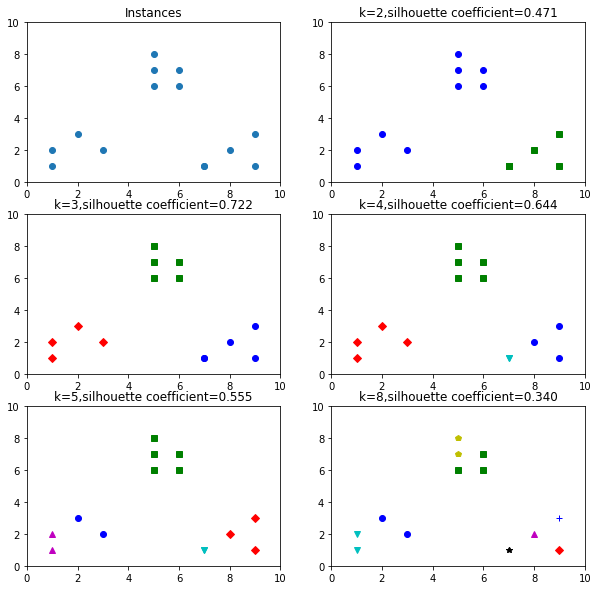

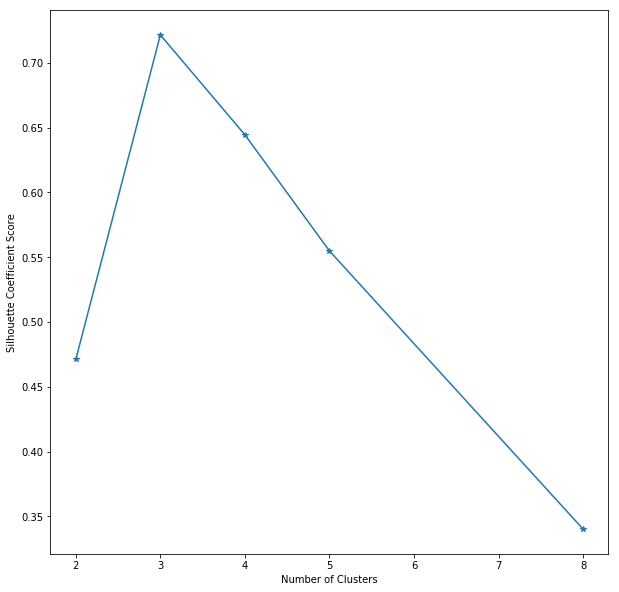

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(10,10)
plt.subplot(3,2,1)

x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])   #初始化原始数据
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)

plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)

colors=['b','g','r','c','m','y','k','b']
markers=['o','s','D','v','^','p','*','+']

clusters=[2,3,4,5,8]
subplot_counter=1
sc_scores=[]
for t in clusters:
    subplot_counter +=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t).fit(X)   #KMeans建模

    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls='None')

    plt.xlim([0,10])
    plt.ylim([0,10])

    sc_score=silhouette_score(X,kmeans_model.labels_,metric='euclidean')   #计算轮廓系数
    sc_scores.append(sc_score)

    plt.title('k=%s,silhouette coefficient=%0.03f'%(t,sc_score))

plt.figure()
plt.plot(clusters,sc_scores,'*-')   #绘制类簇数量与对应轮廓系数关系
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')

plt.show()   

## 如何确定K

利用“肘部观察法”可以粗略地估计相对合理的聚类个数。K-means模型最终期望*所有数据点到其所属的类簇距离的平方和趋于稳定，所以可以通过观察这个值随着K的走势来找出最佳的类簇数量。理想条件下，这个折线在不断下降并且趋于平缓的过程中会有斜率的拐点，这表示从这个拐点对应的K值开始，类簇中心的增加不会过于破坏数据聚类的结构*。



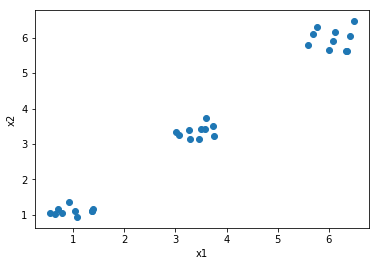

In [18]:
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1=np.random.uniform(0.5,1.5,(2,10))
cluster2=np.random.uniform(5.5,6.5,(2,10))
cluster3=np.random.uniform(3,4,(2,10))

X=np.hstack((cluster1,cluster2,cluster3)).T
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

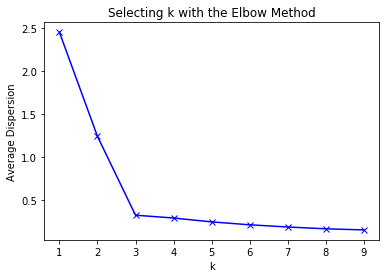

In [19]:
K=range(1,10)
meandistortions=[]

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(\
        sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

从上图可见，类簇数量从1降到2再降到3的过程，更改K值让整体聚类结构有很大改变，这意味着新的聚类数量让算法有更大的收敛空间，这样的K值不能反映真实的类簇数量。而当K=3以后再增大K，平均距离的下降速度显著变缓慢，这意味着进一步增加K值不再会有利于算法的收敛，同时也暗示着K=3是相对最佳的类簇数量。